In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [2]:
data = pd.read_csv('df_train.csv')

In [3]:
data = data[data.settlement_date >= '2010-01-01']
data = data[data.settlement_date < '2011-01-01']
data.reset_index(drop=True, inplace=True)

display(data.head())
display(data.info())
display(data.isna().sum())


,settlement_date,temperature,conditions,precip,cloudcover,humidity,windspeed,nd,pump_storage_pumping,is_holiday
0,2010-01-01 00:00:00,2.5,Partially cloudy,0.0,43.6,75.52,16.2,36566.5,264.5,1.0
1,2010-01-01 01:00:00,0.6,Partially cloudy,0.0,36.1,86.19,14.0,35852.5,289.5,1.0
2,2010-01-01 02:00:00,0.8,Partially cloudy,0.0,48.8,85.14,16.7,34189.5,461.0,1.0
3,2010-01-01 03:00:00,0.7,Partially cloudy,0.0,68.1,83.74,13.9,32453.0,1334.0,1.0
4,2010-01-01 04:00:00,0.4,Partially cloudy,0.0,34.5,83.66,12.2,30450.5,1387.5,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9048 entries, 0 to 9047
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   settlement_date       9048 non-null   object 
 1   temperature           9048 non-null   float64
 2   conditions            9048 non-null   object 
 3   precip                9048 non-null   float64
 4   cloudcover            9048 non-null   float64
 5   humidity              9048 non-null   float64
 6   windspeed             9048 non-null   float64
 7   nd                    9048 non-null   float64
 8   pump_storage_pumping  9048 non-null   float64
 9   is_holiday            9048 non-null   float64
dtypes: float64(8), object(2)
memory usage: 707.0+ KB


None

settlement_date         0
temperature             0
conditions              0
precip                  0
cloudcover              0
humidity                0
windspeed               0
nd                      0
pump_storage_pumping    0
is_holiday              0
dtype: int64

In [4]:
data.index

RangeIndex(start=0, stop=9048, step=1)

In [5]:
data_subsample = data[:400]
data_subsample.shape

(400, 10)

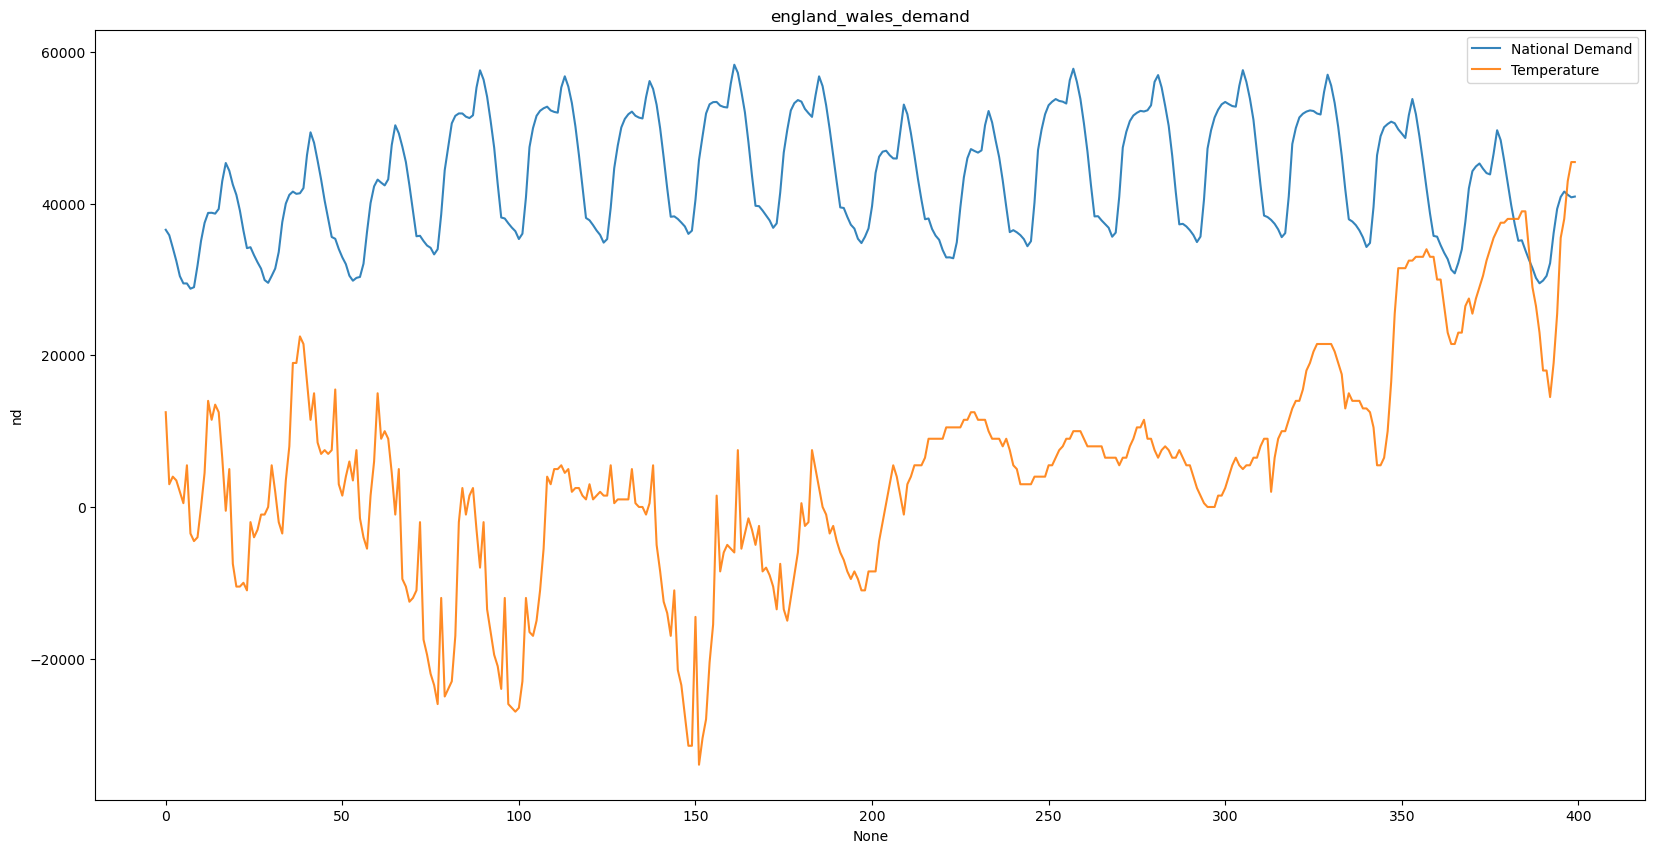

In [6]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=data_subsample.index, y="nd", data=data_subsample, label="National Demand", alpha = 0.9) 
sns.lineplot(x=data_subsample.index, y=(data_subsample.temperature)*5000, data=data_subsample, label="Temperature", alpha = 0.9) 
plt.title("england_wales_demand")
plt.grid(False)
plt.legend()
plt.plot();

In [7]:
data_subsample.head()

,settlement_date,temperature,conditions,precip,cloudcover,humidity,windspeed,nd,pump_storage_pumping,is_holiday
0,2010-01-01 00:00:00,2.5,Partially cloudy,0.0,43.6,75.52,16.2,36566.5,264.5,1.0
1,2010-01-01 01:00:00,0.6,Partially cloudy,0.0,36.1,86.19,14.0,35852.5,289.5,1.0
2,2010-01-01 02:00:00,0.8,Partially cloudy,0.0,48.8,85.14,16.7,34189.5,461.0,1.0
3,2010-01-01 03:00:00,0.7,Partially cloudy,0.0,68.1,83.74,13.9,32453.0,1334.0,1.0
4,2010-01-01 04:00:00,0.4,Partially cloudy,0.0,34.5,83.66,12.2,30450.5,1387.5,1.0


In [8]:
data_subsample.loc[:,'hour'] = pd.to_datetime(data_subsample['settlement_date']).dt.hour

/var/folders/2v/gfm3z1tn5fj8zss_r9hrgnv80000gn/T/ipykernel_78096/3108936087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subsample.loc[:,'hour'] = pd.to_datetime(data_subsample['settlement_date']).dt.hour


In [9]:
data_subsample

,settlement_date,temperature,conditions,precip,cloudcover,humidity,windspeed,nd,pump_storage_pumping,is_holiday,hour
0,2010-01-01 00:00:00,2.5,Partially cloudy,0.0,43.6,75.52,16.2,36566.5,264.5,1.0,0
1,2010-01-01 01:00:00,0.6,Partially cloudy,0.0,36.1,86.19,14.0,35852.5,289.5,1.0,1
2,2010-01-01 02:00:00,0.8,Partially cloudy,0.0,48.8,85.14,16.7,34189.5,461.0,1.0,2
3,2010-01-01 03:00:00,0.7,Partially cloudy,0.0,68.1,83.74,13.9,32453.0,1334.0,1.0,3
4,2010-01-01 04:00:00,0.4,Partially cloudy,0.0,34.5,83.66,12.2,30450.5,1387.5,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
395,2010-01-17 11:00:00,7.1,Partially cloudy,0.0,40.0,83.57,17.7,40900.0,6.5,0.0,11
396,2010-01-17 12:00:00,7.6,Partially cloudy,0.0,50.0,77.98,21.8,41608.0,7.0,0.0,12
397,2010-01-17 13:00:00,8.6,Partially cloudy,0.0,37.7,74.41,21.3,41183.0,5.5,0.0,13
398,2010-01-17 14:00:00,9.1,Partially cloudy,0.0,40.0,73.45,18.6,40848.0,3.0,0.0,14


In [10]:
X = data_subsample.drop('nd', axis=1) 
y = data_subsample['nd'] 
X = X[['temperature', 'hour']]

In [12]:
X

,temperature,hour
0,2.5,0
1,0.6,1
2,0.8,2
3,0.7,3
4,0.4,4
...,...,...
395,7.1,11
396,7.6,12
397,8.6,13
398,9.1,14


In [14]:
X_train = X[:300]
y_train = y[:300]

X_test = X[300:]
y_test = y[300:]

In [15]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = X_train.columns
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = X_test.columns

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

In [16]:
pd.DataFrame(X_train_scaled).head()

,temperature,hour
0,1.238721,-1.627632
1,0.340298,-1.483082
2,0.434868,-1.338532
3,0.387583,-1.193982
4,0.245727,-1.049432


In [17]:
t_train = np.linspace(0, len(X_train), len(X_train))
t_test = np.linspace(t_train[-1], len(X_test)+len(X_train), len(X_test))

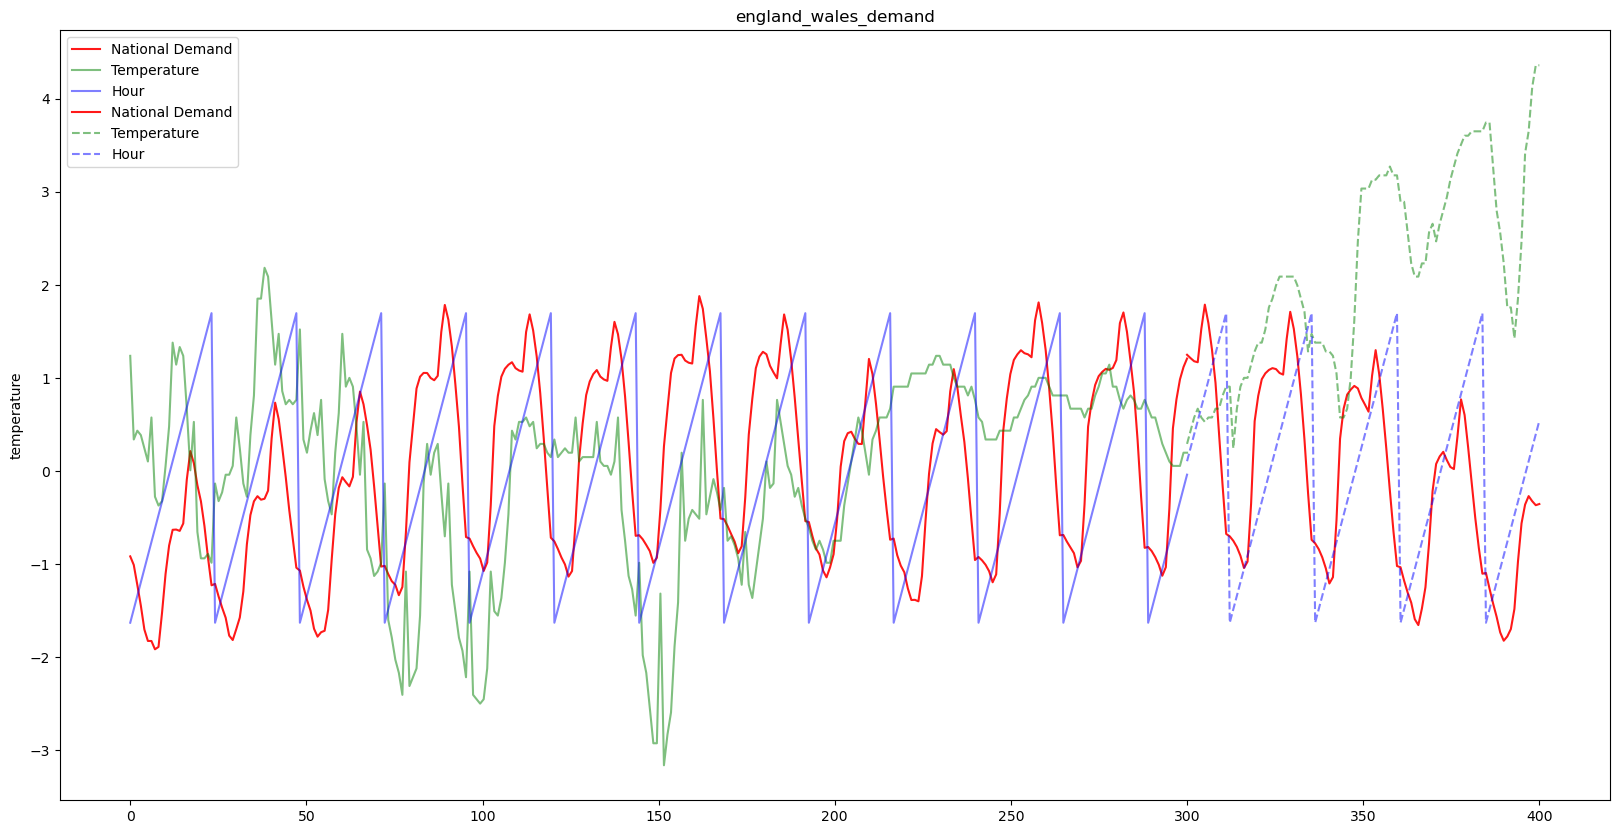

In [20]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=t_train, y=np.squeeze(y_train_scaled.T), label="National Demand", alpha = 0.9, color='red') 
sns.lineplot(x=t_train, y=X_train_scaled['temperature'], label="Temperature", alpha = 0.5, color='green') 
sns.lineplot(x=t_train, y=X_train_scaled['hour'], label="Hour", alpha = 0.5, color='blue') 

sns.lineplot(x=t_test, y=np.squeeze(y_test_scaled.T), label="National Demand", alpha = 0.9, color='red') 
sns.lineplot(x=t_test, y=X_test_scaled['temperature'], label="Temperature", alpha = 0.5, color='green', ls = '--') 
sns.lineplot(x=t_test, y=X_test_scaled['hour'], label="Hour", alpha = 0.5, color='blue', ls = '--') 
plt.title("england_wales_demand")
plt.grid(False)
plt.legend()
plt.plot();

## `Training Data`


In [22]:
X_train_scaled.head()

,temperature,hour
0,1.238721,-1.627632
1,0.340298,-1.483082
2,0.434868,-1.338532
3,0.387583,-1.193982
4,0.245727,-1.049432


In [25]:
import jax
import jax.numpy as jnp
from jax import random
from flax.training import train_state
from jax.experimental.ode import odeint

import time

# RELOADING MODULES
import importlib
import neural_net_jaxopt
import matplotlib.pyplot as plt

# UTILS DIRECTORY
import sys
import os
collocation2_path = os.path.abspath(os.path.join('..', '00_utils'))

if collocation2_path not in sys.path:
    sys.path.append(collocation2_path)

from collocation import compute_weights, lagrange_derivative

import neural_net_jax
importlib.reload(neural_net_jax)
NeuralODE_JAX = neural_net_jax.NeuralODE

In [83]:
def create_delayed_embeddings(x, tau, m):
    n = x.shape[0]  
    
    embeddings = []  
    
    for i in range(n - m * tau):
        if x.ndim == 2:
             embedding = jnp.array([x[i + j * tau, 0] for j in range(m)])  
        elif x.ndim == 1:
            embedding = jnp.array([x[i + j * tau] for j in range(m)])     
        else:
            raise ValueError("Input array x must be either 1D or 2D.")
        embeddings.append(embedding)
    
    return jnp.vstack(embeddings)

In [84]:
tau = 1
m = 3
embeddings = create_delayed_embeddings(y_train_scaled, tau, m)

In [85]:
embeddings.shape

(297, 3)

### Generate `timepoints`

In [86]:
t = jnp.linspace(0., 1., 400)

t_train = t[:300]
t_test = t[300:]

In [78]:
offset = tau*m
y_pred_results = {}

layer_widths = [2, 64, 64, 1]
learning_rate = 1e-3
rng = random.PRNGKey(42)

node_model = NeuralODE_JAX(layer_widths, time_invariant=False)

state = node_model.create_train_state(rng, learning_rate)

i = 300
state = node_model.train(state, t_train[offset : i + offset], jnp.array(y_train_scaled)[offset : i + offset], y_train_scaled[0], num_epochs = 1000, extra_args=(embeddings,t))

"""for i in [50, 300]:
    print(i)
    state = node_model.train(state, t[:i], u_noisy[:i], y[0], num_epochs = 1000)
#state = node_model.train(state, t, u_noisy, y[0], num_epochs = 1000)"""

TracerIntegerConversionError: The __index__() method was called on traced array with shape int64[].
See https://jax.readthedocs.io/en/latest/errors.html#jax.errors.TracerIntegerConversionError

In [71]:
y_train_pred = node_model.neural_ode(state.params, y_train_scaled[0], t_train[:i], state)
y_test_pred = node_model.neural_ode(state.params, y_train_pred[-1], t_test, state)

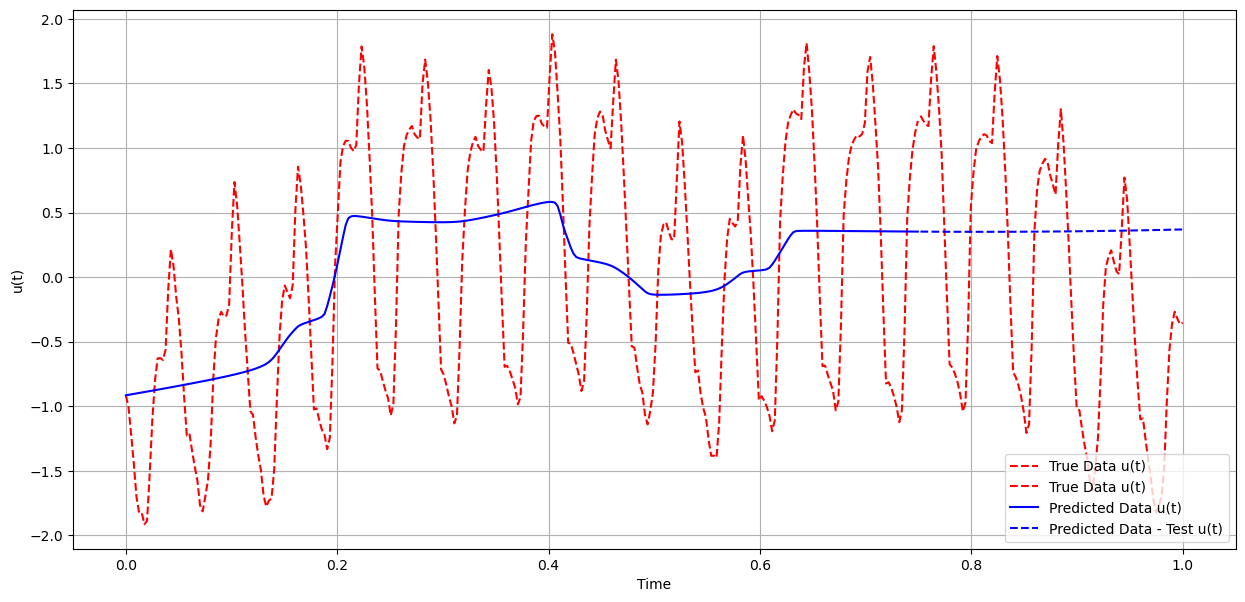

In [74]:
#---------------------------PLOTTING RESULTS--------------------------#
plt.figure(figsize=(15, 7))

plt.plot(t_train[:i], (y_train_scaled)[:i], 'r--', label='True Data u(t)') 
plt.plot(t_test, (y_test_scaled), 'r--', label='True Data u(t)') 
plt.plot(t_train[:i], y_train_pred, 'b', label='Predicted Data u(t)') 
plt.plot(t_test, (y_test_pred), 'b', label='Predicted Data - Test u(t)', ls = "--") 
# plt.scatter(t, u_noisy, label='Observed Data u(t)', alpha=0.5) 

plt.xlabel('Time')
plt.ylabel('u(t)')
plt.legend(loc ="lower right")
plt.grid(True)
plt.show()